# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Creation

In [3]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


We have created two normal distributions with same covariance but different mean 

## Plotting the Data

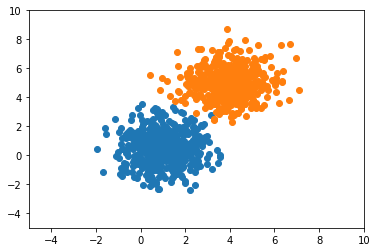

In [4]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1])#, color='red')
plt.show()

In [5]:
r = dist_01.shape[0] + dist_02.shape[0]
c = dist_01.shape[1] + 1
data = np.zeros((r, c))
print(data.shape)

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0

print(data.mean(axis=0))

(1000, 3)
[2.47774229 2.74535496 0.5       ]


## Train and Test Data

In [6]:
#Returns X_train, y_train, X_test, y_test
def split_data(data, ratio=0.33):
    np.random.shuffle(data)
    X = [i[:-1] for i in data]
    labels = [i[-1] for i in data]
    num_train = int((1-ratio)*len(data))
    return np.array(X[:num_train]), np.array(labels[:num_train]).reshape(num_train,1), np.array(X[num_train:]), np.array(labels[num_train:]).reshape((len(data)-num_train),1)

# Model Creation

In [7]:
#Initialize weights
t0 = np.random.rand()
t1 = np.random.rand()
t2 = np.random.rand()
theta = np.array([[t0],[t1],[t2]])
theta.shape

(3, 1)

In [7]:
#Set Learning rate i.e. alpha
lr = 0.1

In [8]:
#Adding bias i.e. theta0 * 1 where 1 is bias
def add_bias(X):
    bias = np.ones((X.shape[0],1))
    return np.concatenate((bias,X),axis=1)

In [9]:
#g = theta0 + theta1 * x1 + theta2 * x2
def get_g(X,theta):
    return np.dot(X,theta)

In [10]:
#Sigmoid Function
def sigmoid(g):
    return 1/(1+np.exp(-1*g))

In [11]:
#Predict Class
def predict(X,theta):
    g = get_g(X,theta)
    h = sigmoid(g)
    return h>0.5

In [12]:
#Get Accuracy
def get_acc(X,y,theta):
    pred_labels = predict(X,theta)
    return sum(pred_labels==y)/len(y)

In [13]:
#Loss Function
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [14]:
#Get Gradient
def get_gradient(X,y,h):
    return ( np.dot(X.T, (h - y)) / y.size ).sum(axis=1).reshape((3,1))

In [15]:
#Plot the graph
def plot_graph(theta):
    plt.figure(0)
    plt.xlim(-5, 10)
    plt.ylim(-5, 10)
    
    X = []
    i = data.min(axis=0)[0]
    while(i<data.max(axis=0)[1]):
        X.append(i)
        i=i+0.1
        
    Y = []
    for i in X:
        tmp = -1*theta[1]*i/theta[2] + -1*theta[0]/theta[2]
        Y.append(tmp)
        
    plt.scatter(X,Y, color='k')
    
    plt.scatter(dist_01[:, 0], dist_01[:, 1])
    plt.scatter(dist_02[:, 0], dist_02[:, 1])#, color='red')
    plt.show()

# Logistic Regression

In [16]:
#Split Dataset
X_train, y_train, X_test, y_test = split_data(data)

In [17]:
#Add Bias
X_train = add_bias(X_train)
X_test = add_bias(X_test)

In [18]:
#Perform Logistic Regression 
def one_step(X,y,lr,theta):
    g = get_g(X_train, theta)
    h = sigmoid(g)
    gradient = get_gradient(X_train, y_train,h)
    theta = theta - lr*gradient
    print("Loss = " + str(loss(h,y)))
    print("Train Accuracy = "+ str(get_acc(X_train,y_train,theta)))
    print("Test Accuracy = " + str(get_acc(X_test,y_test,theta)))
    print("theta = ")
    print(theta)
    return theta

Loss = 0.6145935292104407
Train Accuracy = [0.62780269]
Test Accuracy = [0.67673716]
theta = 
[[0.01743235]
 [0.13766352]
 [0.93520603]]
Loss = 0.5865642270639192
Train Accuracy = [0.632287]
Test Accuracy = [0.68882175]
theta = 
[[-0.01387008]
 [ 0.10381346]
 [ 0.91212311]]
Loss = 0.5604780616579512
Train Accuracy = [0.63976084]
Test Accuracy = [0.69486405]
theta = 
[[-0.04432441]
 [ 0.07156554]
 [ 0.8899428 ]]
Loss = 0.5363975967524712
Train Accuracy = [0.65022422]
Test Accuracy = [0.6978852]
theta = 
[[-0.07390729]
 [ 0.04102842]
 [ 0.86879385]]
Loss = 0.5143714345985203
Train Accuracy = [0.67414051]
Test Accuracy = [0.70694864]
theta = 
[[-0.10259859]
 [ 0.01231158]
 [ 0.84881282]]
Loss = 0.4944277613620286
Train Accuracy = [0.69058296]
Test Accuracy = [0.72205438]
theta = 
[[-0.13038254]
 [-0.01447925]
 [ 0.83013919]]
Loss = 0.47656686336998905
Train Accuracy = [0.71300448]
Test Accuracy = [0.73413897]
theta = 
[[-0.15724927]
 [-0.03924838]
 [ 0.81290834]]
Loss = 0.4607536687386069

Loss = 0.26176498237925094
Train Accuracy = [0.91778774]
Test Accuracy = [0.90936556]
theta = 
[[-1.20021777]
 [-0.12514435]
 [ 0.87261594]]
Loss = 0.26036783327529817
Train Accuracy = [0.91778774]
Test Accuracy = [0.90936556]
theta = 
[[-1.21170345]
 [-0.12343438]
 [ 0.87452712]]
Loss = 0.2589868681945704
Train Accuracy = [0.92077728]
Test Accuracy = [0.90936556]
theta = 
[[-1.2231225 ]
 [-0.1217221 ]
 [ 0.87641733]]
Loss = 0.257621817329062
Train Accuracy = [0.92227205]
Test Accuracy = [0.90936556]
theta = 
[[-1.23447562]
 [-0.12000779]
 [ 0.87828702]]
Loss = 0.2562724168489576
Train Accuracy = [0.92376682]
Test Accuracy = [0.91238671]
theta = 
[[-1.2457635 ]
 [-0.11829169]
 [ 0.88013661]]
Loss = 0.2549384087308852
Train Accuracy = [0.92526158]
Test Accuracy = [0.91238671]
theta = 
[[-1.25698684]
 [-0.11657408]
 [ 0.88196653]]
Loss = 0.2536195405923762
Train Accuracy = [0.92526158]
Test Accuracy = [0.91238671]
theta = 
[[-1.2681463 ]
 [-0.11485517]
 [ 0.88377717]]
Loss = 0.2523155655

Test Accuracy = [0.95770393]
theta = 
[[-1.90641466]
 [-0.00269171]
 [ 0.97693293]]
Loss = 0.188847903434593
Train Accuracy = [0.96113602]
Test Accuracy = [0.95770393]
theta = 
[[-1.91436986e+00]
 [-1.17189116e-03]
 [ 9.78012636e-01]]
Loss = 0.18818169638779816
Train Accuracy = [0.96113602]
Test Accuracy = [0.96072508]
theta = 
[[-1.92229147e+00]
 [ 3.43425114e-04]
 [ 9.79086816e-01]]
Loss = 0.1875210600866141
Train Accuracy = [0.96113602]
Test Accuracy = [0.96072508]
theta = 
[[-1.93017978e+00]
 [ 1.85423004e-03]
 [ 9.80155545e-01]]
Loss = 0.18686592704403762
Train Accuracy = [0.96113602]
Test Accuracy = [0.96072508]
theta = 
[[-1.93803503]
 [ 0.00336052]
 [ 0.9812189 ]]
Loss = 0.1862162308206317
Train Accuracy = [0.96113602]
Test Accuracy = [0.96072508]
theta = 
[[-1.94585751]
 [ 0.00486229]
 [ 0.98227697]]
Loss = 0.18557190600473555
Train Accuracy = [0.96113602]
Test Accuracy = [0.96072508]
theta = 
[[-1.95364746]
 [ 0.00635953]
 [ 0.98332981]]
Loss = 0.184932888193122
Train Accurac

Train Accuracy = [0.96860987]
Test Accuracy = [0.97583082]
theta = 
[[-2.51337558]
 [ 0.11673913]
 [ 1.05840114]]
Loss = 0.14528939471810604
Train Accuracy = [0.96860987]
Test Accuracy = [0.97583082]
theta = 
[[-2.51911795]
 [ 0.11788586]
 [ 1.05917834]]
Loss = 0.14494099538005306
Train Accuracy = [0.96860987]
Test Accuracy = [0.97583082]
theta = 
[[-2.52484254]
 [ 0.1190291 ]
 [ 1.05995347]]
Loss = 0.14459474196858538
Train Accuracy = [0.9715994]
Test Accuracy = [0.97583082]
theta = 
[[-2.53054946]
 [ 0.12016886]
 [ 1.06072656]]
Loss = 0.14425061478976126
Train Accuracy = [0.9715994]
Test Accuracy = [0.97583082]
theta = 
[[-2.53623881]
 [ 0.12130516]
 [ 1.06149762]]
Loss = 0.14390859438477505
Train Accuracy = [0.9715994]
Test Accuracy = [0.97583082]
theta = 
[[-2.54191071]
 [ 0.12243801]
 [ 1.06226667]]
Loss = 0.14356866152654899
Train Accuracy = [0.9715994]
Test Accuracy = [0.97583082]
theta = 
[[-2.54756526]
 [ 0.12356744]
 [ 1.06303372]]
Loss = 0.1432307972163821
Train Accuracy = [

Test Accuracy = [0.97583082]
theta = 
[[-2.9334478 ]
 [ 0.20050584]
 [ 1.11639407]]
Loss = 0.12243811826246793
Train Accuracy = [0.97757848]
Test Accuracy = [0.97583082]
theta = 
[[-2.93802541]
 [ 0.20141482]
 [ 1.11704067]]
Loss = 0.12221640171844199
Train Accuracy = [0.97757848]
Test Accuracy = [0.97583082]
theta = 
[[-2.94259176]
 [ 0.20232145]
 [ 1.11768601]]
Loss = 0.12199577240434338
Train Accuracy = [0.97757848]
Test Accuracy = [0.97583082]
theta = 
[[-2.9471469 ]
 [ 0.20322572]
 [ 1.11833012]]
Loss = 0.12177622224908438
Train Accuracy = [0.97757848]
Test Accuracy = [0.97583082]
theta = 
[[-2.95169089]
 [ 0.20412766]
 [ 1.11897299]]
Loss = 0.1215577432606162
Train Accuracy = [0.97757848]
Test Accuracy = [0.97583082]
theta = 
[[-2.95622378]
 [ 0.20502727]
 [ 1.11961463]]
Loss = 0.12134032752497888
Train Accuracy = [0.97757848]
Test Accuracy = [0.97583082]
theta = 
[[-2.96074562]
 [ 0.20592456]
 [ 1.12025504]]
Loss = 0.12112396720536422
Train Accuracy = [0.97757848]
Test Accuracy 

Loss = 0.10742394262171139
Train Accuracy = [0.97757848]
Test Accuracy = [0.97885196]
theta = 
[[-3.27575239]
 [ 0.26808977]
 [ 1.16571737]]
Loss = 0.10726958911920181
Train Accuracy = [0.97757848]
Test Accuracy = [0.97885196]
theta = 
[[-3.27956236]
 [ 0.26883722]
 [ 1.16627753]]
Loss = 0.10711586192813582
Train Accuracy = [0.97757848]
Test Accuracy = [0.97885196]
theta = 
[[-3.28336459]
 [ 0.26958305]
 [ 1.1668368 ]]
Loss = 0.10696275716556246
Train Accuracy = [0.97757848]
Test Accuracy = [0.97885196]
theta = 
[[-3.28715911]
 [ 0.27032725]
 [ 1.16739518]]
Loss = 0.10681027098056652
Train Accuracy = [0.97757848]
Test Accuracy = [0.97885196]
theta = 
[[-3.29094596]
 [ 0.27106984]
 [ 1.16795266]]
Loss = 0.10665839955394121
Train Accuracy = [0.97757848]
Test Accuracy = [0.97885196]
theta = 
[[-3.29472517]
 [ 0.27181082]
 [ 1.16850927]]
Loss = 0.10650713909786494
Train Accuracy = [0.97757848]
Test Accuracy = [0.97885196]
theta = 
[[-3.29849677]
 [ 0.2725502 ]
 [ 1.16906499]]
Loss = 0.1063

Train Accuracy = [0.97757848]
Test Accuracy = [0.98791541]
theta = 
[[-3.50184161]
 [ 0.31225544]
 [ 1.19937525]]
Loss = 0.0986643090410331
Train Accuracy = [0.97757848]
Test Accuracy = [0.98791541]
theta = 
[[-3.50522009]
 [ 0.31291253]
 [ 1.19988451]]
Loss = 0.09854336480942867
Train Accuracy = [0.97757848]
Test Accuracy = [0.98791541]
theta = 
[[-3.50859253]
 [ 0.31356836]
 [ 1.20039305]]
Loss = 0.09842285148344387
Train Accuracy = [0.97757848]
Test Accuracy = [0.98791541]
theta = 
[[-3.51195895]
 [ 0.31422294]
 [ 1.20090086]]
Loss = 0.09830276670630698
Train Accuracy = [0.97757848]
Test Accuracy = [0.98791541]
theta = 
[[-3.51531938]
 [ 0.31487628]
 [ 1.20140795]]
Loss = 0.09818310813847841
Train Accuracy = [0.97757848]
Test Accuracy = [0.98791541]
theta = 
[[-3.51867384]
 [ 0.31552837]
 [ 1.20191431]]
Loss = 0.09806387345749418
Train Accuracy = [0.97757848]
Test Accuracy = [0.98791541]
theta = 
[[-3.52202235]
 [ 0.31617922]
 [ 1.20241996]]
Loss = 0.09794506035781085
Train Accuracy

Train Accuracy = [0.97907324]
Test Accuracy = [0.99093656]
theta = 
[[-3.78698063]
 [ 0.36743332]
 [ 1.24297332]]
Loss = 0.0891763804028635
Train Accuracy = [0.97907324]
Test Accuracy = [0.99093656]
theta = 
[[-3.78988825]
 [ 0.36799322]
 [ 1.24342407]]
Loss = 0.08908673908770691
Train Accuracy = [0.97907324]
Test Accuracy = [0.9939577]
theta = 
[[-3.79279145]
 [ 0.36855223]
 [ 1.24387426]]
Loss = 0.08899736945585154
Train Accuracy = [0.97907324]
Test Accuracy = [0.9939577]
theta = 
[[-3.79569025]
 [ 0.36911033]
 [ 1.24432388]]
Loss = 0.0889082702376771
Train Accuracy = [0.97907324]
Test Accuracy = [0.9939577]
theta = 
[[-3.79858466]
 [ 0.36966753]
 [ 1.24477293]]
Loss = 0.08881944017153007
Train Accuracy = [0.97907324]
Test Accuracy = [0.9939577]
theta = 
[[-3.80147469]
 [ 0.37022384]
 [ 1.24522143]]
Loss = 0.08873087800366133
Train Accuracy = [0.97907324]
Test Accuracy = [0.9939577]
theta = 
[[-3.80436035]
 [ 0.37077926]
 [ 1.24566936]]
Loss = 0.0886425824881644
Train Accuracy = [0.9

Loss = 0.08423890547829825
Train Accuracy = [0.98206278]
Test Accuracy = [0.9939577]
theta = 
[[-3.95672944]
 [ 0.40003772]
 [ 1.26948239]]
Loss = 0.08416356301793822
Train Accuracy = [0.98206278]
Test Accuracy = [0.9939577]
theta = 
[[-3.9593909 ]
 [ 0.40054764]
 [ 1.26990107]]
Loss = 0.08408842828251722
Train Accuracy = [0.98206278]
Test Accuracy = [0.9939577]
theta = 
[[-3.96204868]
 [ 0.40105682]
 [ 1.27031926]]
Loss = 0.08401350038720921
Train Accuracy = [0.98206278]
Test Accuracy = [0.9939577]
theta = 
[[-3.9647028 ]
 [ 0.40156525]
 [ 1.27073697]]
Loss = 0.08393877845225939
Train Accuracy = [0.98206278]
Test Accuracy = [0.9939577]
theta = 
[[-3.96735327]
 [ 0.40207295]
 [ 1.27115419]]
Loss = 0.083864261602948
Train Accuracy = [0.98206278]
Test Accuracy = [0.9939577]
theta = 
[[-3.97000009]
 [ 0.40257992]
 [ 1.27157093]]
Loss = 0.08378994896955418
Train Accuracy = [0.98206278]
Test Accuracy = [0.9939577]
theta = 
[[-3.97264328]
 [ 0.40308615]
 [ 1.27198718]]
Loss = 0.0837158396873

Loss = 0.0786802943988178
Train Accuracy = [0.98355755]
Test Accuracy = [0.9939577]
theta = 
[[-4.16363175]
 [ 0.43957484]
 [ 1.30229257]]
Loss = 0.07861943992948672
Train Accuracy = [0.98355755]
Test Accuracy = [0.9939577]
theta = 
[[-4.16602347]
 [ 0.44003074]
 [ 1.30267482]]
Loss = 0.07855873472234011
Train Accuracy = [0.98355755]
Test Accuracy = [0.9939577]
theta = 
[[-4.16841224]
 [ 0.44048605]
 [ 1.30305667]]
Loss = 0.07849817821064765
Train Accuracy = [0.98355755]
Test Accuracy = [0.9939577]
theta = 
[[-4.17079809]
 [ 0.44094078]
 [ 1.30343812]]
Loss = 0.07843776983058046
Train Accuracy = [0.98355755]
Test Accuracy = [0.9939577]
theta = 
[[-4.17318101]
 [ 0.44139493]
 [ 1.30381916]]
Loss = 0.07837750902119256
Train Accuracy = [0.98355755]
Test Accuracy = [0.9939577]
theta = 
[[-4.17556102]
 [ 0.4418485 ]
 [ 1.3041998 ]]
Loss = 0.07831739522440233
Train Accuracy = [0.98355755]
Test Accuracy = [0.9939577]
theta = 
[[-4.17793811]
 [ 0.44230149]
 [ 1.30458005]]
Loss = 0.078257427884

Test Accuracy = [0.9939577]
theta = 
[[-4.3353356 ]
 [ 0.47224756]
 [ 1.32989567]]
Loss = 0.07444431803096002
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.33752616]
 [ 0.47266371]
 [ 1.33024986]]
Loss = 0.07439337478018967
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.33971427]
 [ 0.47307938]
 [ 1.3306037 ]]
Loss = 0.07434254484281852
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.34189995]
 [ 0.47349456]
 [ 1.33095719]]
Loss = 0.0742918278281932
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.34408319]
 [ 0.47390927]
 [ 1.33131035]]
Loss = 0.07424122334747914
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.34626401]
 [ 0.47432351]
 [ 1.33166315]]
Loss = 0.07419073101364981
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.34844241]
 [ 0.47473726]
 [ 1.33201562]]
Loss = 0.07414035044147624
Train Accuracy = [0.98505232]
Test Accuracy = [0.99

Loss = 0.07087026328141328
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.49725276]
 [ 0.50296805]
 [ 1.35620472]]
Loss = 0.0708269339606
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.49927057]
 [ 0.50335043]
 [ 1.35653418]]
Loss = 0.07078369278512503
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.50128633]
 [ 0.5037324 ]
 [ 1.35686334]]
Loss = 0.07074053947681601
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.50330003]
 [ 0.50411398]
 [ 1.3571922 ]]
Loss = 0.07069747375868736
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.50531169]
 [ 0.50449516]
 [ 1.35752077]]
Loss = 0.0706544953549341
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.5073213 ]
 [ 0.50487595]
 [ 1.35784905]]
Loss = 0.07061160399092536
Train Accuracy = [0.98505232]
Test Accuracy = [0.9939577]
theta = 
[[-4.50932888]
 [ 0.50525633]
 [ 1.35817702]]
Loss = 0.0705687993931981

Train Accuracy = [0.98654709]
Test Accuracy = [0.9939577]
theta = 
[[-4.63376345]
 [ 0.52881544]
 [ 1.37857707]]
Loss = 0.06799809954626991
Train Accuracy = [0.98654709]
Test Accuracy = [0.9939577]
theta = 
[[-4.63564726]
 [ 0.52917185]
 [ 1.37888695]]
Loss = 0.06796039943019061
Train Accuracy = [0.98654709]
Test Accuracy = [0.9939577]
theta = 
[[-4.63752929]
 [ 0.52952791]
 [ 1.37919658]]
Loss = 0.06792277033097663
Train Accuracy = [0.98654709]
Test Accuracy = [0.9939577]
theta = 
[[-4.63940955]
 [ 0.52988363]
 [ 1.37950594]]
Loss = 0.0678852120409825
Train Accuracy = [0.98654709]
Test Accuracy = [0.9939577]
theta = 
[[-4.64128803]
 [ 0.53023901]
 [ 1.37981504]]
Loss = 0.06784772435338436
Train Accuracy = [0.98804185]
Test Accuracy = [0.9939577]
theta = 
[[-4.64316474]
 [ 0.53059405]
 [ 1.38012388]]
Loss = 0.0678103070621758
Train Accuracy = [0.98804185]
Test Accuracy = [0.9939577]
theta = 
[[-4.64503969]
 [ 0.53094874]
 [ 1.38043246]]
Loss = 0.06777295996216379
Train Accuracy = [0.98

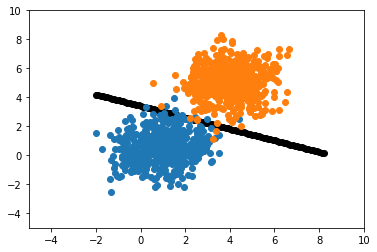

In [20]:
#Do this in for loop for multiple steps
for i in range(1000):
    theta = one_step(X_train,y_train,lr,theta)
    
plot_graph(theta)

In [ ]:
Name?
